In [ ]:
import numpy as np
import pandas as pd
import re as re
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings
filterwarnings(action='ignore')

from app.settings.constants import TRAIN_CSV, VAL_CSV 

df = pd.read_csv(TRAIN_CSV, header = 0)
pd.set_option("display.max_columns", None)
df.head(10)

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID,class
0,1.237661e+18,131.780006,31.176427,19.36940,18.12787,17.52943,17.19604,16.95938,3606,301,4,55,1.428936e+18,0.083662,1269,52937,613,GALAXY
1,1.237661e+18,156.737605,45.040668,21.55932,20.79034,20.13112,19.76833,19.55089,3530,301,6,256,8.318262e+18,1.514154,7388,56783,414,QSO
2,1.237668e+18,219.297509,14.916453,22.15941,21.44747,20.71200,19.84396,20.05038,5322,301,4,64,6.159933e+18,0.810434,5471,56034,489,GALAXY
3,1.237663e+18,239.961448,26.161812,20.95769,19.39191,18.67904,18.35519,18.12411,4002,301,4,208,2.785483e+18,-0.000261,2474,54564,24,STAR
4,1.237655e+18,251.462479,39.158686,20.64332,19.69718,19.41441,19.37871,19.34221,2328,301,6,66,5.847047e+18,-0.000848,5193,56066,904,STAR
5,1.237661e+18,215.544403,42.383916,18.48365,16.68731,15.86130,15.50104,15.21766,3699,301,2,169,1.570704e+18,0.075863,1395,52825,268,GALAXY
6,1.237662e+18,176.498968,43.762328,21.42699,21.11976,20.99029,20.79965,20.65914,3813,301,1,186,9.423843e+18,0.995965,8370,57520,219,QSO
7,1.237661e+18,226.157723,40.372066,16.54807,14.68606,13.83695,13.46843,13.17371,3699,301,6,222,1.574178e+18,0.029817,1398,53146,619,GALAXY
8,1.237680e+18,26.912364,19.204114,21.93447,21.69373,21.12063,21.01174,20.41924,7923,301,5,351,8.587483e+18,1.567184,7627,56933,890,QSO
9,1.237679e+18,11.961564,13.206970,22.19410,21.35137,21.38910,21.51182,21.58952,7773,301,5,388,1.243243e+19,2.517676,11042,58462,900,QSO


In [3]:
df.shape

(18900, 18)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18900 entries, 0 to 18899
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   obj_ID       18900 non-null  float64
 1   alpha        18900 non-null  float64
 2   delta        18900 non-null  float64
 3   u            18900 non-null  float64
 4   g            18900 non-null  float64
 5   r            18900 non-null  float64
 6   i            18900 non-null  float64
 7   z            18900 non-null  float64
 8   run_ID       18900 non-null  int64  
 9   rerun_ID     18900 non-null  int64  
 10  cam_col      18900 non-null  int64  
 11  field_ID     18900 non-null  int64  
 12  spec_obj_ID  18900 non-null  float64
 13  redshift     18900 non-null  float64
 14  plate        18900 non-null  int64  
 15  MJD          18900 non-null  int64  
 16  fiber_ID     18900 non-null  int64  
 17  class        18900 non-null  object 
dtypes: float64(10), int64(7), object(1)
memory usa

In [5]:
df.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.890000e+04,18900.000000,18900.000000,18900.000000,18900.000000,18900.000000,18900.000000,18900.000000,18900.000000,18900.0,18900.000000,18900.000000,1.890000e+04,18900.000000,18900.00000,18900.000000,18900.000000
mean,1.237665e+18,177.616434,24.459073,21.777401,20.491604,19.723876,19.276651,19.018356,4487.701376,301.0,3.544762,182.900370,6.063615e+18,0.708353,5385.46164,55740.097672,451.891005
std,8.503806e+12,98.588805,19.766642,2.167540,1.951841,1.832147,1.779689,1.804675,1979.954608,0.0,1.583407,143.407012,3.381306e+18,0.907133,3003.18739,1801.318196,272.184312
min,1.237646e+18,0.010959,-17.636198,10.996230,11.338970,10.982550,10.873740,11.194480,109.000000,301.0,1.000000,11.000000,2.995801e+17,-0.004136,266.00000,51608.000000,1.000000
25%,1.237659e+18,124.800405,5.031420,20.234797,19.062523,18.417397,18.058585,17.787442,3185.000000,301.0,2.000000,81.000000,3.116610e+18,0.000074,2768.00000,54535.000000,226.000000
50%,1.237663e+18,181.223578,24.531086,21.760075,20.893455,20.197725,19.598640,19.248750,4152.000000,301.0,4.000000,146.000000,5.837374e+18,0.421176,5184.50000,55979.000000,435.000000
75%,1.237670e+18,236.805843,40.735331,23.229683,21.864442,21.109110,20.666990,20.381860,5641.000000,301.0,5.000000,239.000000,8.670741e+18,1.108629,7701.00000,57105.000000,648.000000
max,1.237681e+18,359.998965,83.000519,32.781390,27.894820,27.397090,29.854050,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.00000,58932.000000,1000.000000


In [6]:
df['class'].unique()

array(['GALAXY', 'QSO', 'STAR'], dtype=object)

class
GALAXY    6308
STAR      6300
QSO       6292
Name: count, dtype: int64


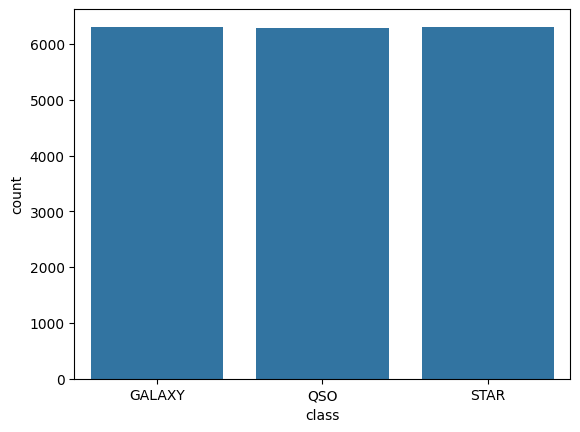

In [7]:
sns.countplot(data=df, x='class')
print(df['class'].value_counts())

In [8]:
df.columns

Index(['obj_ID', 'alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID',
       'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'redshift', 'plate',
       'MJD', 'fiber_ID', 'class'],
      dtype='object')

In [26]:
Xcols = ['u', 'g', 'r', 'i', 'z', 'redshift', 'plate']

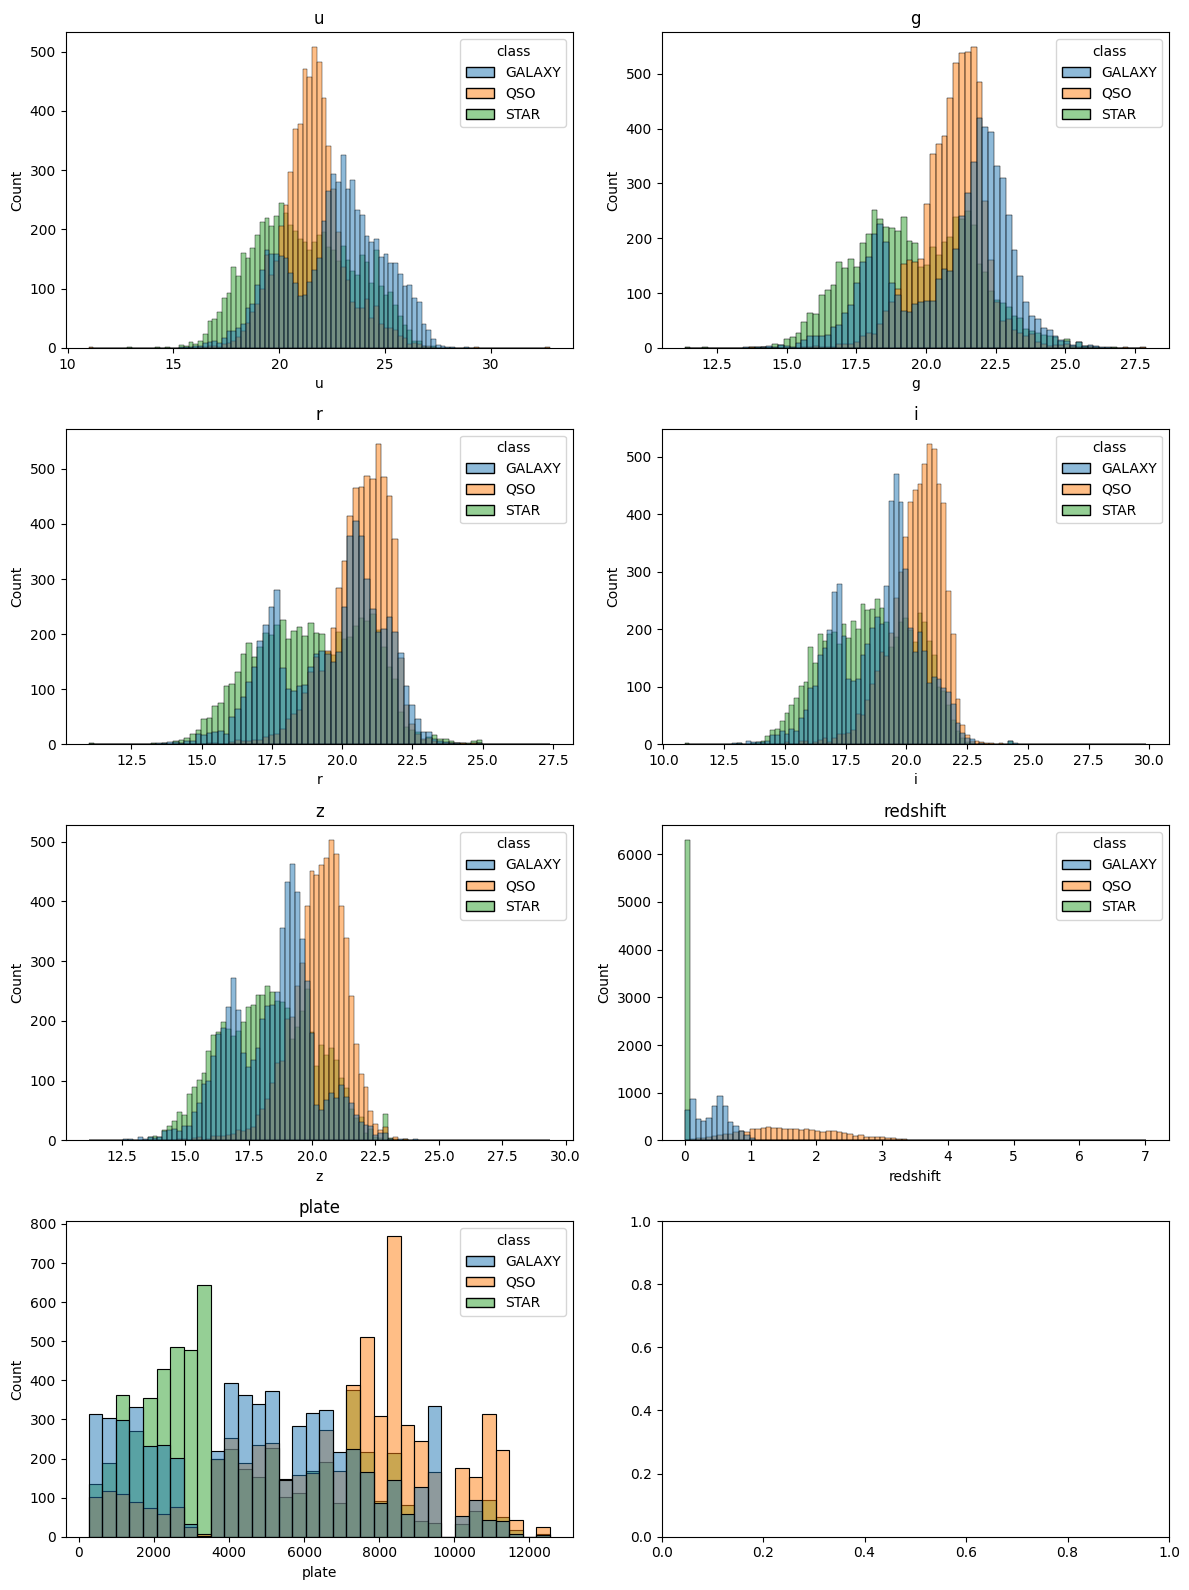

In [10]:
n = len(Xcols)
cols = 2
rows = (n + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(12, 4 * rows))

axes = axes.flatten()

for i, col in enumerate(Xcols):
    sns.histplot(data=df, x=col, ax=axes[i], hue='class')
    axes[i].set_title(f"{col}")

plt.tight_layout()
plt.show()


<Axes: xlabel='alpha', ylabel='delta'>

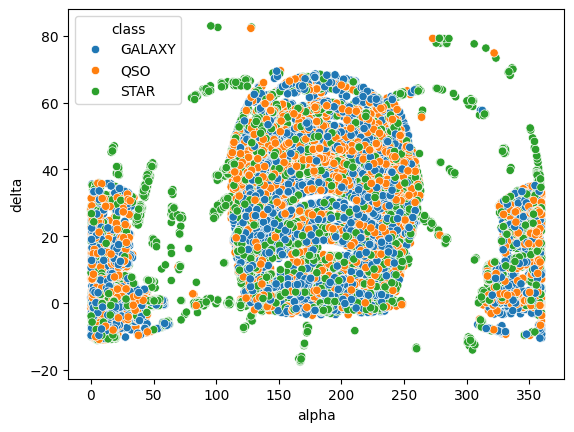

In [11]:
sns.scatterplot(data=df, x='alpha', y='delta', hue='class')

In [12]:
df['plate'].nunique()

5185

In [13]:
Xcols

['u', 'g', 'r', 'i', 'z', 'redshift', 'plate']

<Axes: xlabel='redshift', ylabel='plate'>

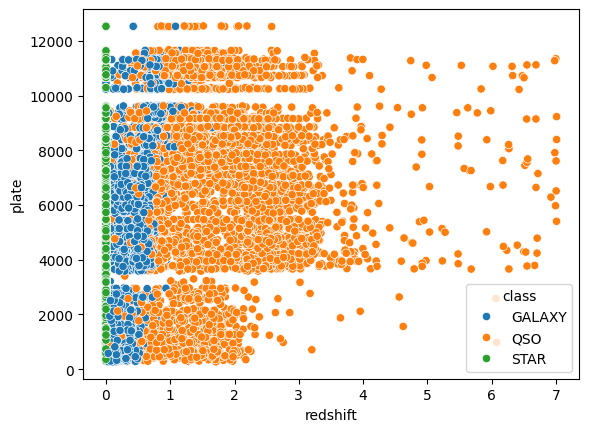

In [14]:
sns.scatterplot(data=df, x='redshift', y='plate', hue='class')

In [15]:
filters = ['u', 'g', 'r', 'i', 'z', 'class']

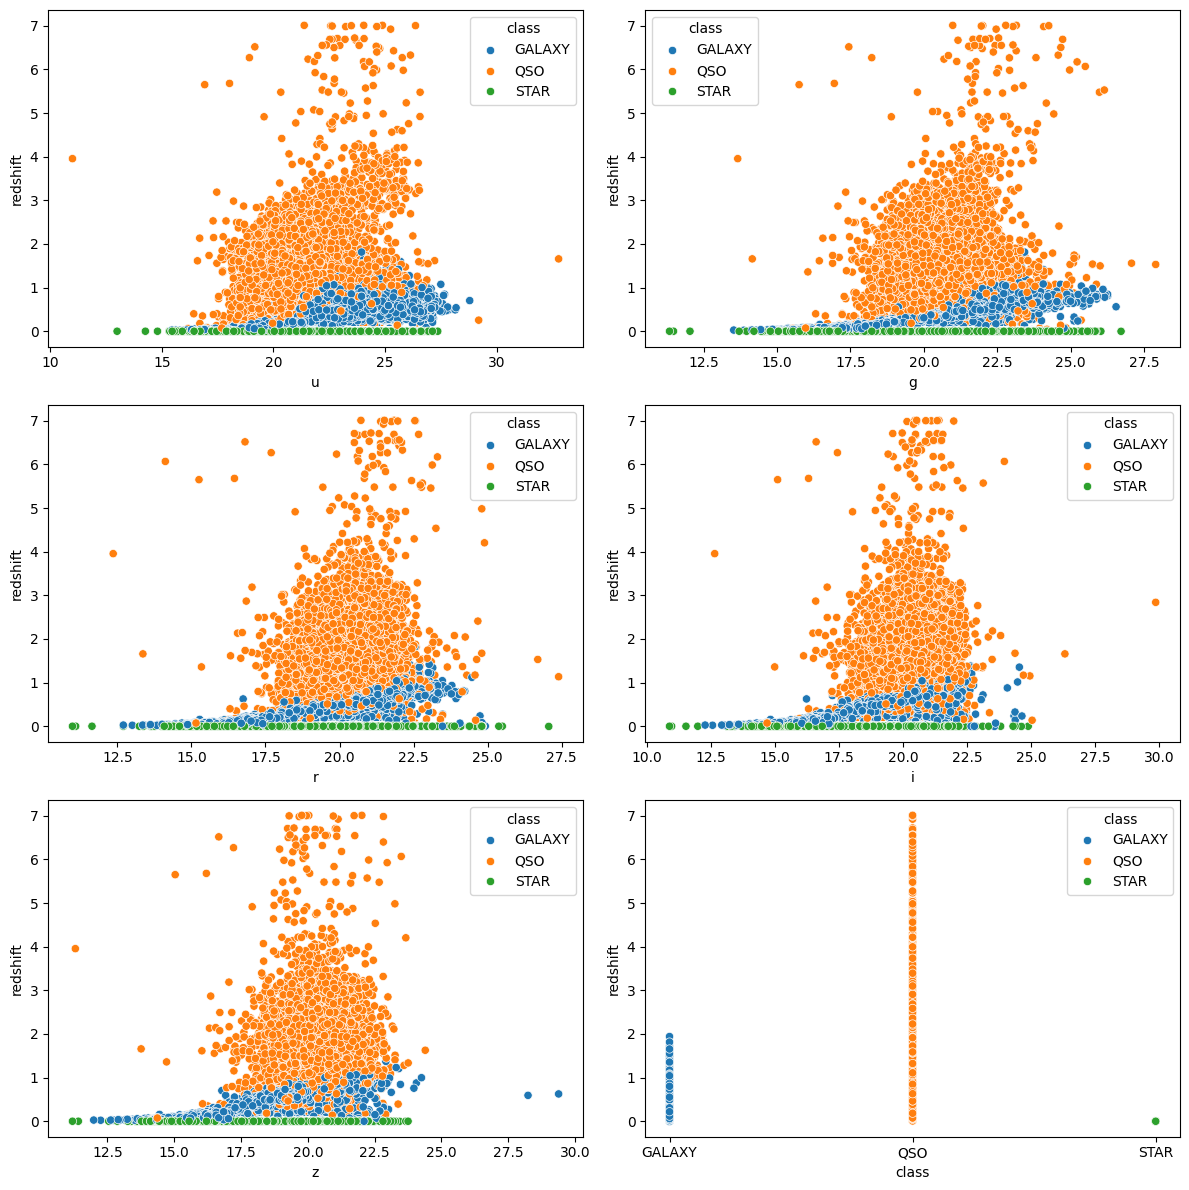

In [16]:
n = len(filters)
cols = 2
rows = (n + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(12, 4 * rows))

axes = axes.flatten()

for i, col in enumerate(filters):
    sns.scatterplot(data=df, x=col, y='redshift', ax=axes[i], hue='class')

plt.tight_layout()
plt.show()


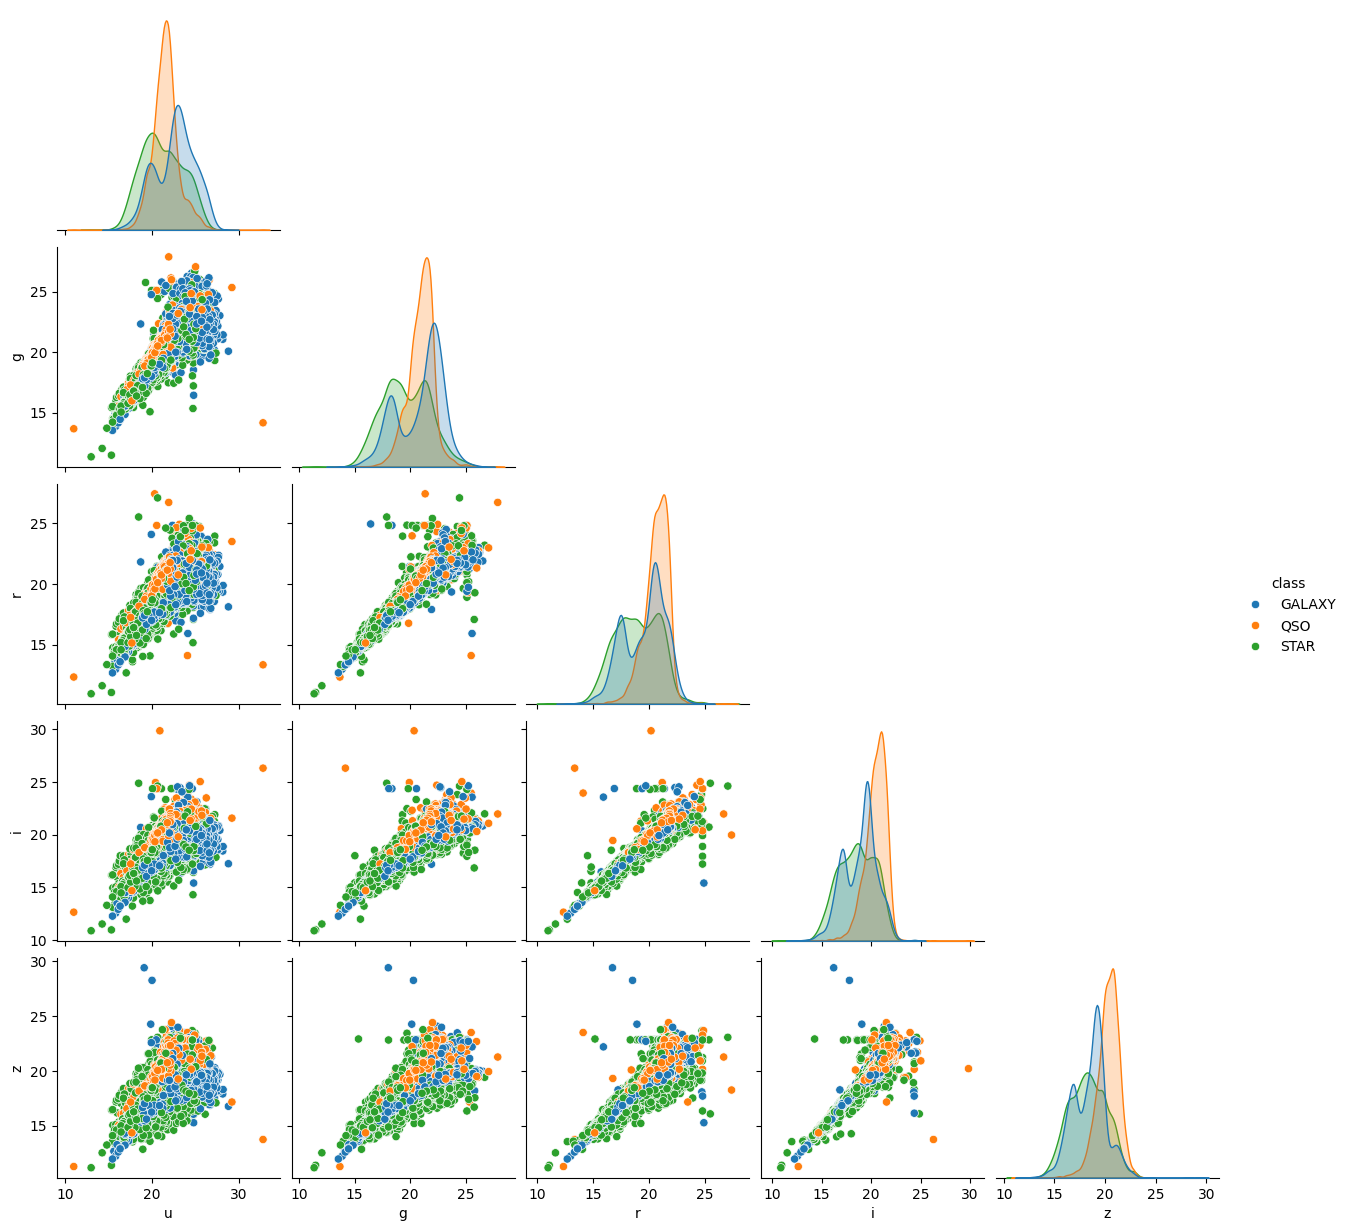

In [17]:
sns.pairplot(df[filters], hue='class', corner=True)

<Axes: >

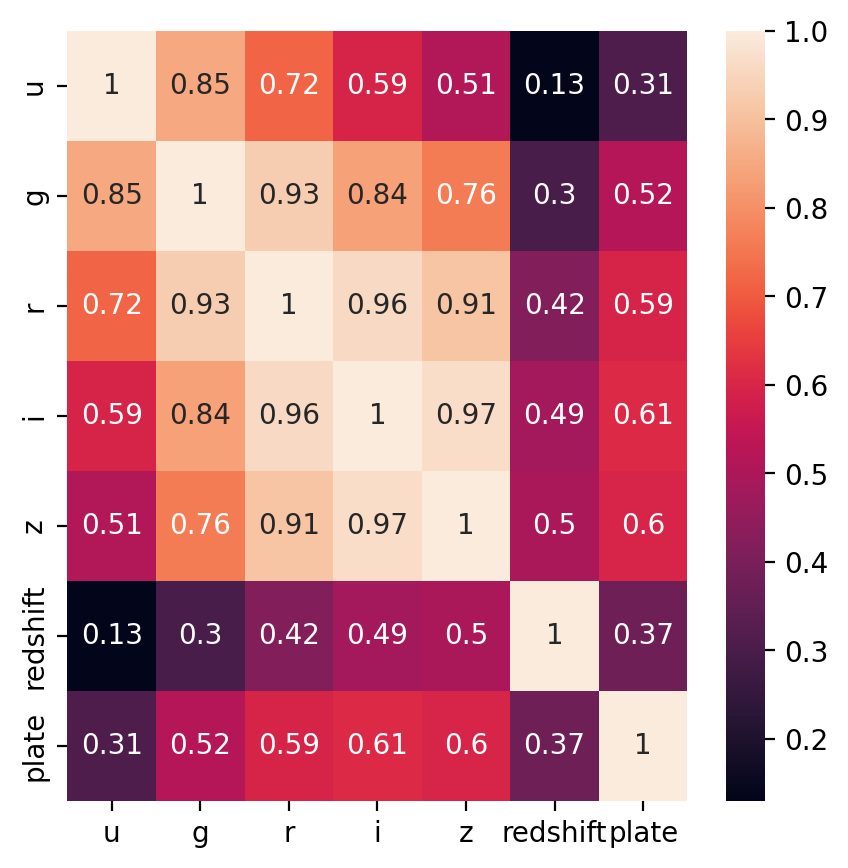

In [18]:
plt.figure(figsize=(5, 5), dpi=200)
sns.heatmap(data=df[Xcols].corr(), annot=True)

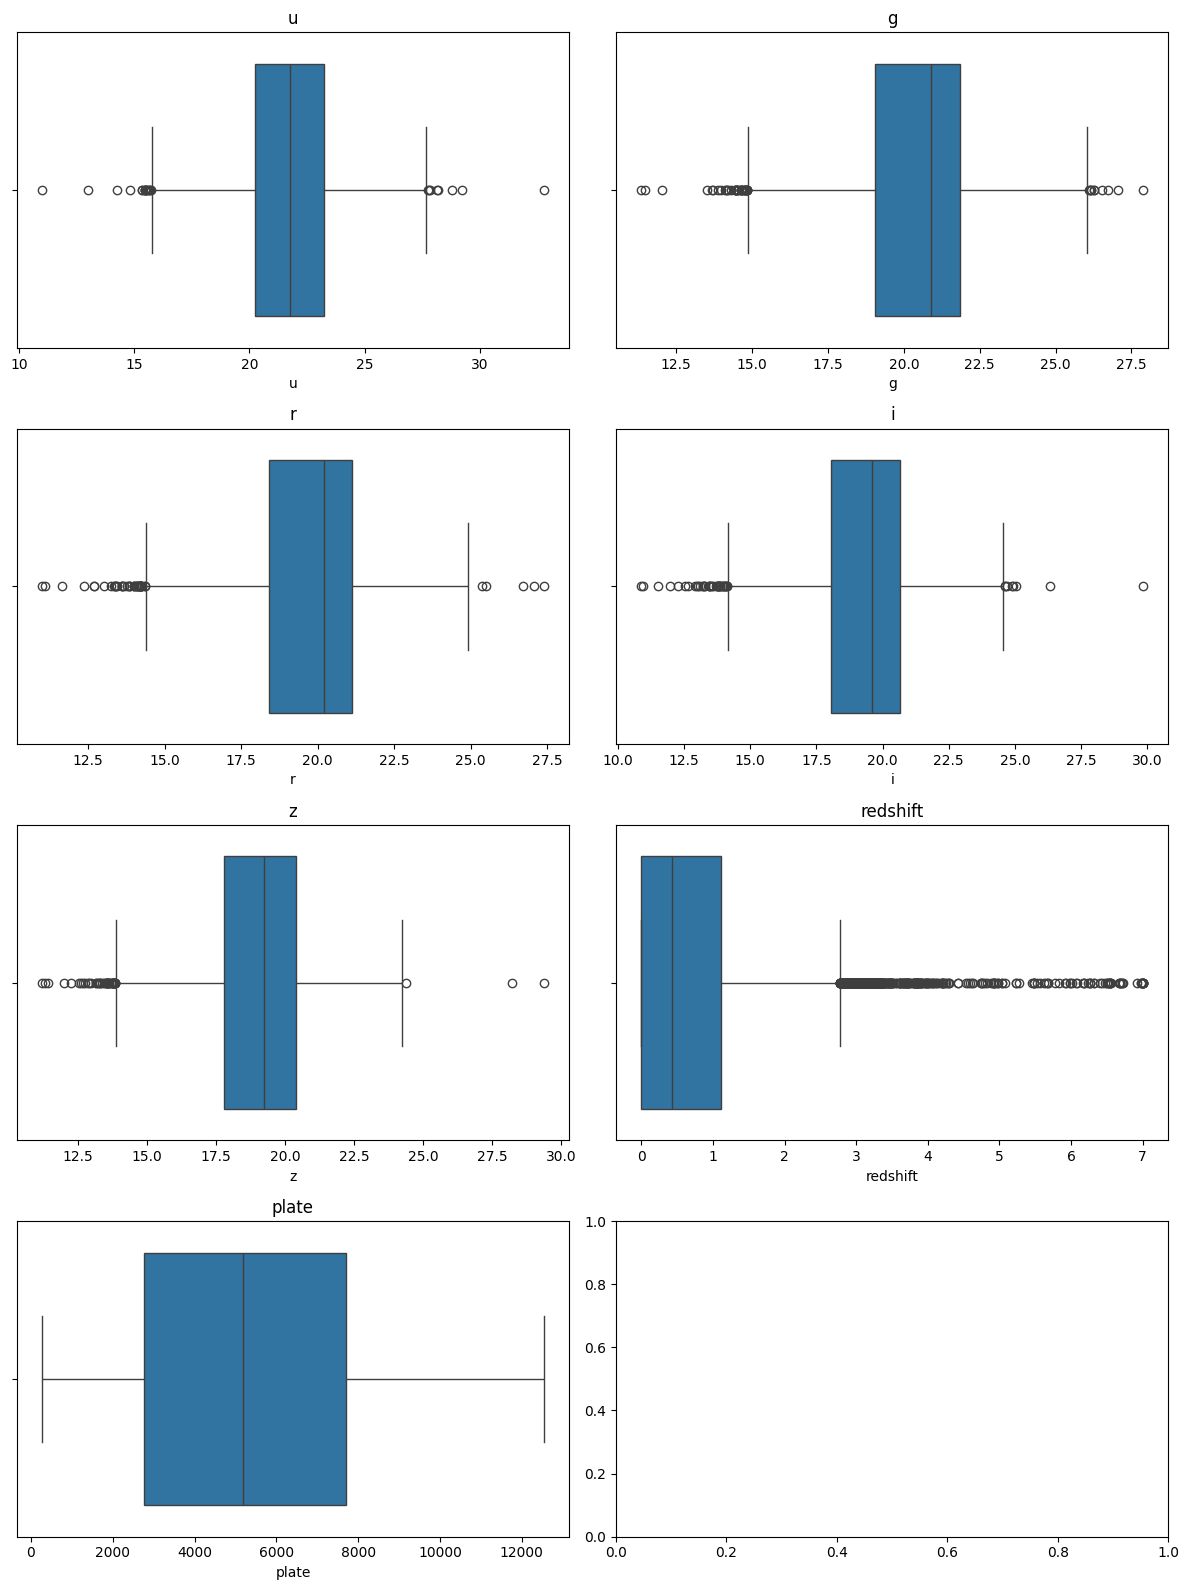

In [20]:
n = len(Xcols)
cols = 2
rows = (n + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(12, 4 * rows))

axes = axes.flatten()

for i, col in enumerate(Xcols):
    sns.boxplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f"{col}")

plt.tight_layout()
plt.show()